# Insurance Data Analytics- Exploratory Data Analysi (EDA)
  -  Goal: To Develop a foundational understanding of the data, assess its quality, and uncover initial patterns in risk and profitability


## 🛠️ Setup & Imports
-  We load the necessary packages and prepare the notebook for data profiling and EDA.**

In [1]:
# impost dependancies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate 
# Set plot style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")
import os 
import sys
sys.path.append('F:/Insurance_Risk-Analysis_Predictive_Modelling/src')

## 1. Data Understanding and summarization 
   - loading of Data
   - Understanding of data

In [2]:
# Loading of insurance csv file and displaying os some some row 
from src.data_loader import load_insurance_data
path='F:/Insurance_Risk-Analysis_Predictive_Modelling/data/output2.csv'
df=load_insurance_data(path)
df.head() 

   UnderwrittenCoverID  PolicyID  ... TotalPremium  TotalClaims
0               145249     12827  ...    21.929825          0.0
1               145249     12827  ...    21.929825          0.0
2               145249     12827  ...     0.000000          0.0
3               145255     12827  ...   512.848070          0.0
4               145255     12827  ...     0.000000          0.0

[5 rows x 52 columns]
Shape: (1000098, 52)
Memory Usage (bytes): 2228419002


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 2. Basic Statistical summarization
  - Data structure (to know  Data types in each column)

In [47]:
# Print the column names and data types
print("=== Data Structure ===")
print(df.info())


=== Data Structure ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Prov

- Descriptive Statistics

In [15]:
# descriptive statistics 
from src.data_stats import generate_descriptive_stats
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 
                  'Cylinders', 'cubiccapacity', 'kilowatts' , 'NumberOfDoors']
generate_descriptive_stats(df,numerical_cols)
#print(df[numerical_cols].describe())


=== Descriptive Statistics ===
       TotalPremium   TotalClaims    SumInsured  CustomValueEstimate  \
count  1.000098e+06  1.000098e+06  1.000098e+06         2.204560e+05   
mean   6.190550e+01  6.486119e+01  6.041727e+05         2.255311e+05   
std    2.302845e+02  2.384075e+03  1.508332e+06         5.645157e+05   
min   -7.825768e+02 -1.200241e+04  1.000000e-02         2.000000e+04   
25%    0.000000e+00  0.000000e+00  5.000000e+03         1.350000e+05   
50%    2.178333e+00  0.000000e+00  7.500000e+03         2.200000e+05   
75%    2.192982e+01  0.000000e+00  2.500000e+05         2.800000e+05   
max    6.528260e+04  3.930921e+05  1.263620e+07         2.655000e+07   

           Cylinders  cubiccapacity      kilowatts  NumberOfDoors  
count  999546.000000  999546.000000  999546.000000  999546.000000  
mean        4.046642    2466.743258      97.207919       4.019250  
std         0.294020     442.800640      19.393256       0.468314  
min         0.000000       0.000000       0.000

,TotalPremium,TotalClaims,SumInsured,CustomValueEstimate,Cylinders,cubiccapacity,kilowatts,NumberOfDoors
count,1.000098e+06,1.000098e+06,1.000098e+06,2.204560e+05,999546.000000,999546.000000,999546.000000,999546.000000
mean,6.190550e+01,6.486119e+01,6.041727e+05,2.255311e+05,4.046642,2466.743258,97.207919,4.019250
std,2.302845e+02,2.384075e+03,1.508332e+06,5.645157e+05,0.294020,442.800640,19.393256,0.468314
min,-7.825768e+02,-1.200241e+04,1.000000e-02,2.000000e+04,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,5.000000e+03,1.350000e+05,4.000000,2237.000000,75.000000,4.000000
50%,2.178333e+00,0.000000e+00,7.500000e+03,2.200000e+05,4.000000,2694.000000,111.000000,4.000000
75%,2.192982e+01,0.000000e+00,2.500000e+05,2.800000e+05,4.000000,2694.000000,111.000000,4.000000
max,6.528260e+04,3.930921e+05,1.263620e+07,2.655000e+07,10.000000,12880.000000,309.000000,6.000000


##   3.Data Quality Assasement
 -  Missing value in each Column
 -  Duplicates

In [ ]:
# Data Quality Assessment
from src.data_stats import missing_values
missing_stats = missing_values(df)


=== Missing Values ===
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64
Number of duplicates: 0


## 4. Key column Calculation 
-  Total claim:is total claim request due to an insured event
-  Total Premium: is the amount of total policy holder pays for insurance coverage  
-  Over all loss ratio: indicating profitability or TotalClaim/TotalPremium

In [8]:
#key column calculation 
from src.data_stats import calculate_claim_premium_summary
key_column = calculate_claim_premium_summary(df)

Key calculation over same Important column 
               Metric         Value   Formatted
0        Total Claims  6.486755e+07  64,867,546
1       Total Premium  6.191156e+07  61,911,563
2  Overall Loss Ratio  1.047745e+00     104.77%


## 5. Loss Ratio by Province, VehicleType, and Gender
-  loss Ratio By Province 
-  loss Ratio By VehicleType
-  Loss Ratio BY Gender

In [4]:
from src.data_stats import calculate_and_display_loss_ratios
calculate_and_display_loss_ratios(df)


=== Loss Ratios by Province, VehicleType, and Gender ===
+-------------+-------------------+--------------+
| Category    | Value             |   Loss Ratio |
+=============+===================+==============+
| Province    | Eastern Cape      |         0.63 |
+-------------+-------------------+--------------+
| Province    | Free State        |         0.68 |
+-------------+-------------------+--------------+
| Province    | Gauteng           |         1.22 |
+-------------+-------------------+--------------+
| Province    | KwaZulu-Natal     |         1.08 |
+-------------+-------------------+--------------+
| Province    | Limpopo           |         0.66 |
+-------------+-------------------+--------------+
| Province    | Mpumalanga        |         0.72 |
+-------------+-------------------+--------------+
| Province    | North West        |         0.79 |
+-------------+-------------------+--------------+
| Province    | Northern Cape     |         0.28 |
+-------------+---------

# 6. Visualization or Analysis 
  ## *I. Univariate Analysis*
-  Numerical feature distributions 
-  Categorical feature distributions
-  Outlier Detection

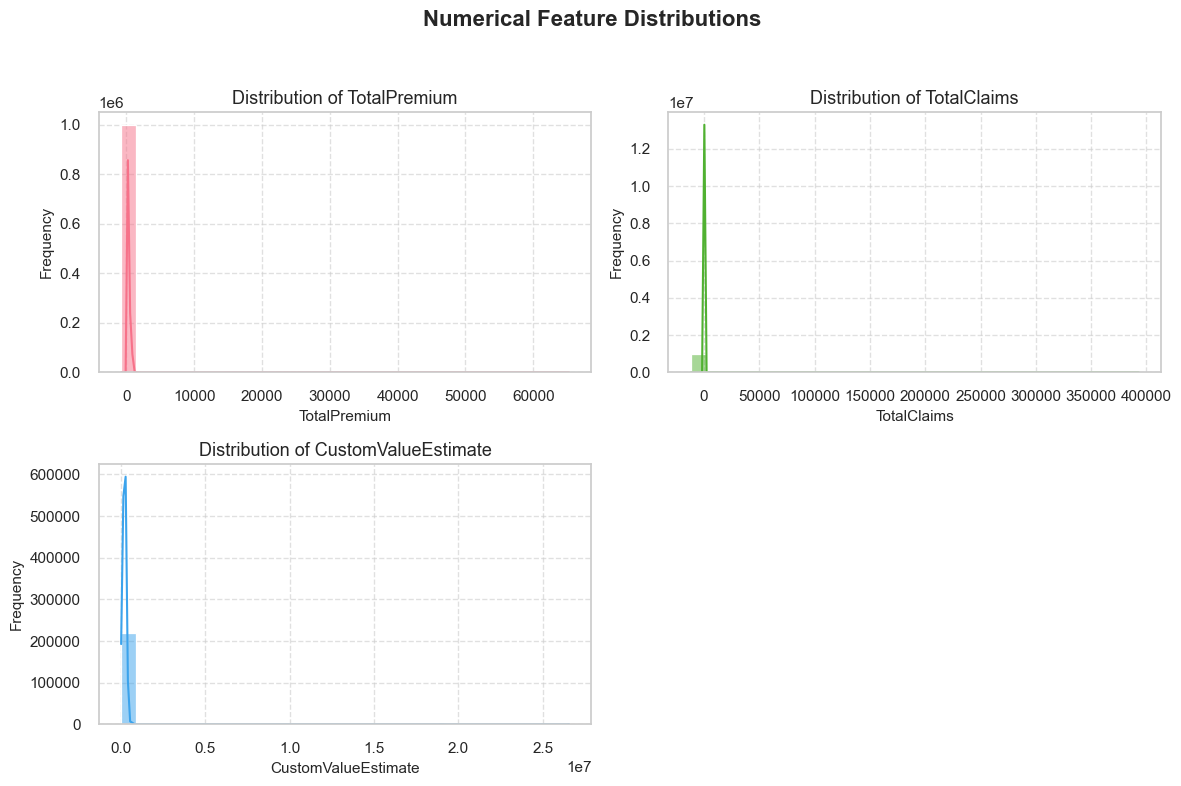

In [ ]:
# Numerical Feature Distribution
from src.data_visualization import plot_numerical_distributions
plot_numerical_distributions(df, numerical_cols=['TotalPremium', 'TotalClaims','CustomValueEstimate'])

**Categorical Feature Distribution**
-  understanding of Province,VehicleType and Gender features Distribution  


f:\Insurance_Risk-Analysis_Predictive_Modelling\src\data_visualization.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index,


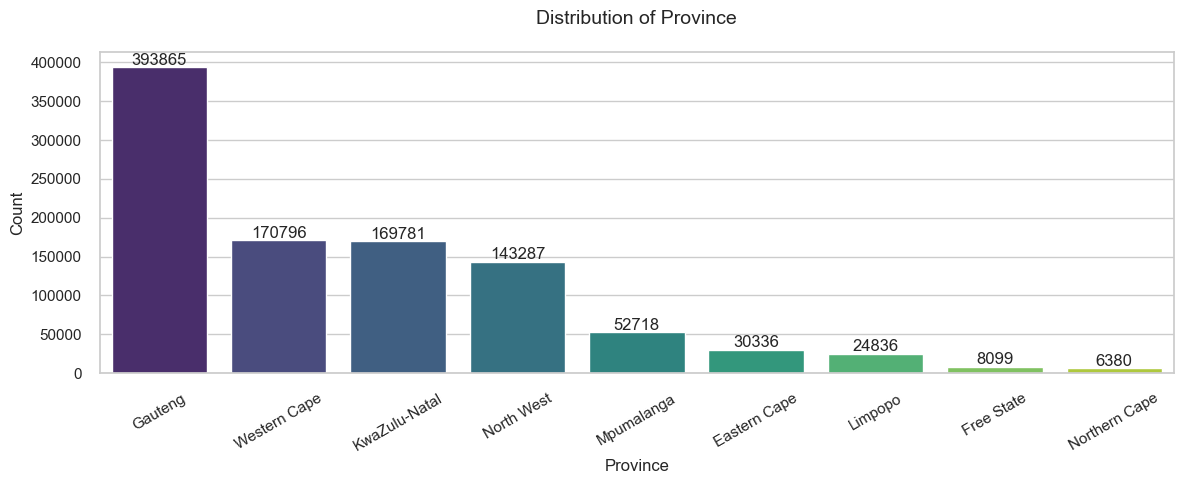

f:\Insurance_Risk-Analysis_Predictive_Modelling\src\data_visualization.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index,


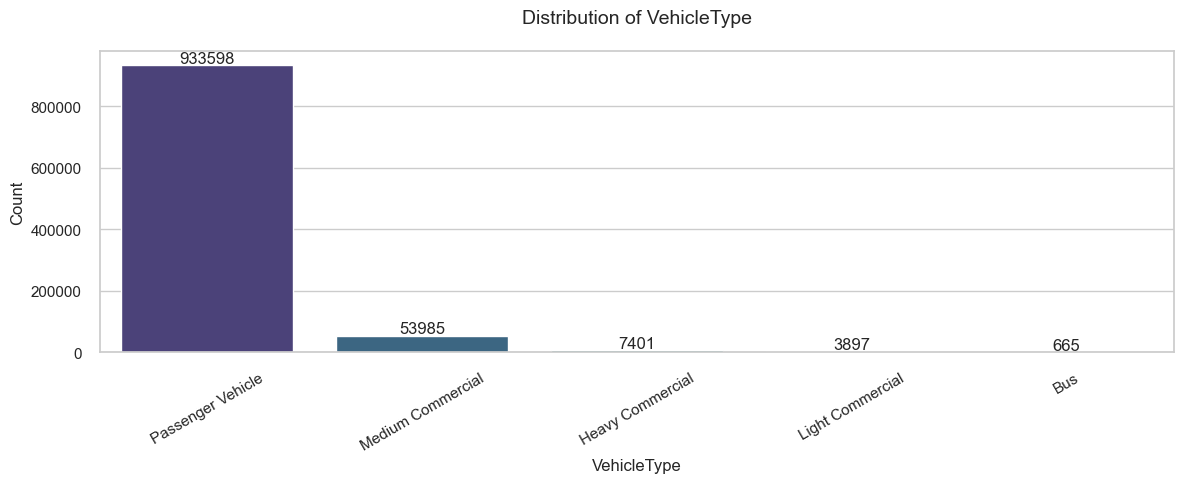

In [5]:
from src.data_visualization import plot_categorical_distributions
plot_categorical_distributions(
    df,
    categorical_cols=['Province', 'VehicleType'],  # Only plot these columns
    figsize=(12, 5),
    rotation=30,
    palette='viridis',
    save_path='F:/Insurance_Risk-Analysis_Predictive_Modelling/data/outputs'
)

**Outlier Detection : Box Plots**
-  describe the about the distribution pf claim and Premium using BoxPLot 

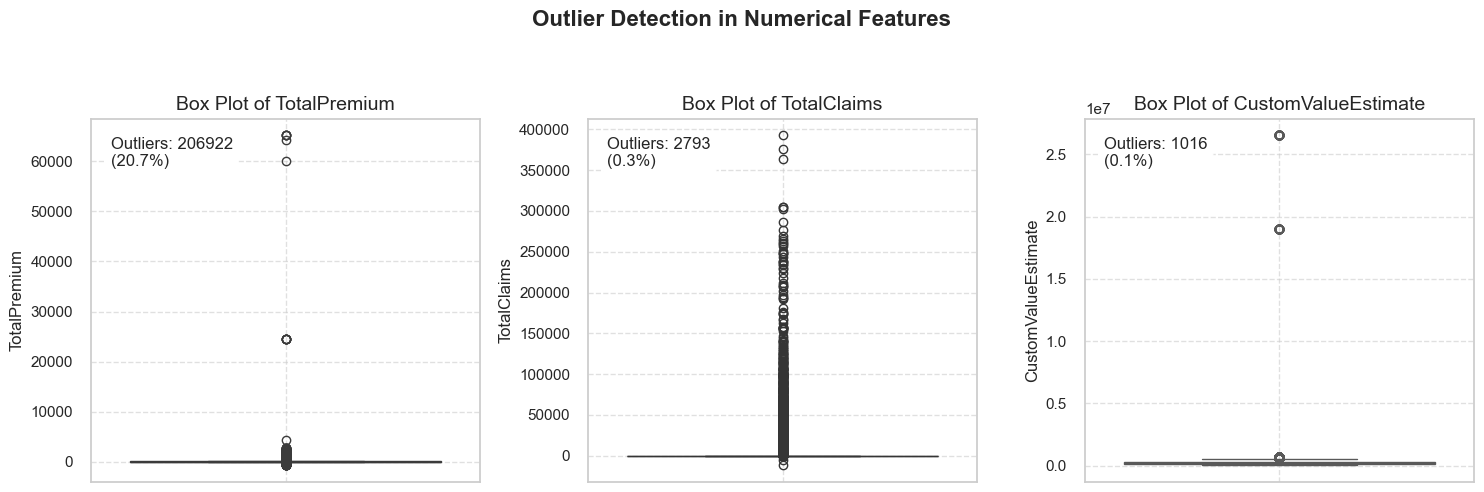

In [3]:
from src.data_visualization import plot_outliers_boxplot
plot_outliers_boxplot(
    df,
    numerical_cols=['TotalPremium', 'TotalClaims', 'CustomValueEstimate'],
    figsize=(15, 5),
    palette="viridis",
    whis=2.0,  # More strict outlier detection
    save_path='F:/Insurance_Risk-Analysis_Predictive_Modelling/data/outputs'
)

## **II. Bivariate Analysis**
-  Correlation Matrix

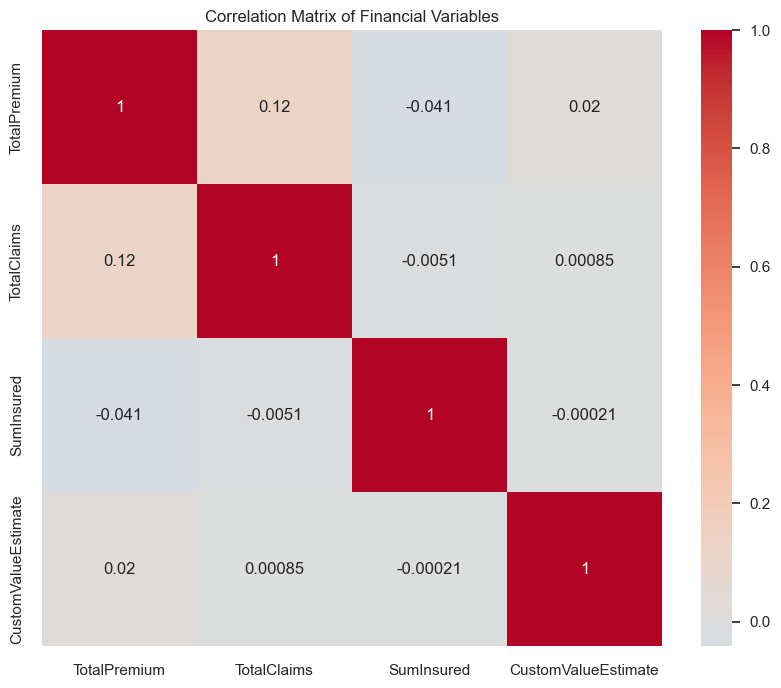

In [11]:

# Bivariate Analysis: Correlation Matrix
correlation_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
corr_matrix = df[correlation_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Financial Variables')
plt.savefig('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/outputs/correlation_matrix.png')
plt.show()

-  scatterplot of premium vs Claim by postalcode

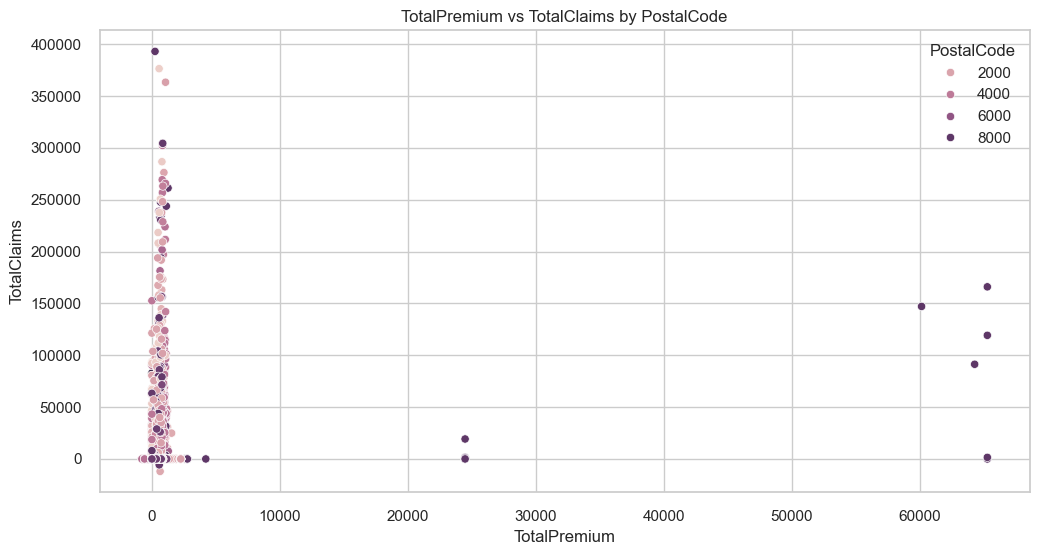

In [22]:
# Premium vs Claims by PostalCode
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode')
plt.title('TotalPremium vs TotalClaims by PostalCode')
plt.show()

**Temporal Trends: Claims and Premiums Over Time**

In [23]:
 #Temporal Trends: Claims and Premiums Over Time
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly_trends = df.groupby('TransactionMonth').agg({
    'TotalClaims': ['mean', 'count'],
    'TotalPremium': 'mean'
}).reset_index()
monthly_trends.columns = ['TransactionMonth', 'AvgClaims', 'ClaimCount', 'AvgPremium']
print(monthly_trends)

   TransactionMonth  AvgClaims  ClaimCount  AvgPremium
0        2013-10-01   0.000000          45    8.245856
1        2013-11-01  42.295217        1196   17.815608
2        2013-12-01   6.209623        1495   28.417892
3        2014-01-01   6.807258        1827   29.603282
4        2014-02-01  30.547676        2062   29.480328
5        2014-03-01  93.128973        3466   28.441198
6        2014-04-01  44.350859        6919   33.859566
7        2014-05-01  54.622811        9484   39.636411
8        2014-06-01  42.677753       11822   41.128354
9        2014-07-01  28.777234       14907   40.871142
10       2014-08-01  35.331688       19626   46.236530
11       2014-09-01  34.971237       25990   47.615307
12       2014-10-01  52.178981       33820   49.389565
13       2014-11-01  78.640464       48248   58.145536
14       2014-12-01  99.868279       62457   61.790555
15       2015-01-01  76.764888       71576   60.294349
16       2015-02-01  75.334178       83198   62.320372
17       2

**Monthly Trend: Claim frequency and Claim Severity**

In [31]:
# Monthly Trend: Claim frequency and Claim Severity
# Convert to datetime if not already
df['RegistrationYear'] = pd.to_datetime(df['RegistrationYear'])
# Monthly trends
monthly_data = df.resample('M', on='RegistrationYear').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
})
monthly_data['ClaimFrequency'] = monthly_data['TotalClaims'] / monthly_data['PolicyID']
monthly_data['ClaimSeverity'] = monthly_data['TotalClaims'] / monthly_data['TotalClaims'].count()
print(monthly_data)

C:\Users\user\AppData\Local\Temp\ipykernel_48836\1212714214.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='RegistrationYear').agg({


                  TotalPremium   TotalClaims  PolicyID  ClaimFrequency  \
RegistrationYear                                                         
1970-01-31        6.191156e+07  6.486755e+07   1000098        64.86119   

                  ClaimSeverity  
RegistrationYear                 
1970-01-31         6.486755e+07  


**Vehicle Make/Model Analysis**

In [35]:
## 7. Vehicle Make/Model Analysis

vehicle_analysis = df.groupby(['make', 'Model']).agg({
    'TotalClaims': ['sum', 'count', 'mean'],
    'TotalPremium': 'sum'
}).sort_values(('TotalClaims', 'sum'), ascending=False)

top_5_high_claim = vehicle_analysis.head(5)
top_5_low_claim = vehicle_analysis.tail(5)
print('Top 5 High claim Vehicle:\n', top_5_high_claim)
print('\nTop 5 Low claim Vehicle:\n', top_5_low_claim)

Top 5 High claim Vehicle:
                                         TotalClaims                     \
                                                sum   count       mean   
make   Model                                                             
TOYOTA QUANTUM 2.7 SESFIKILE 16s       1.203750e+07  186087  64.687504   
       QUANTUM 2.7 SESFIKILE 15s       1.151173e+07  167523  68.717336   
       QUANTUM 2.7 SESFIKILE 14s       9.967764e+06  137242  72.629110   
       QUANTUM 2.5 D-4D SESFIKILE 16s  7.733236e+06   99444  77.764731   
       HiACE SUPER 16 F/Lift           3.275205e+06   79525  41.184595   

                                       TotalPremium  
                                                sum  
make   Model                                         
TOYOTA QUANTUM 2.7 SESFIKILE 16s       1.372352e+07  
       QUANTUM 2.7 SESFIKILE 15s       1.072645e+07  
       QUANTUM 2.7 SESFIKILE 14s       7.943711e+06  
       QUANTUM 2.5 D-4D SESFIKILE 16s  7.596108e+06  
  

## *III.Visualization : Loss Ratio by Province*

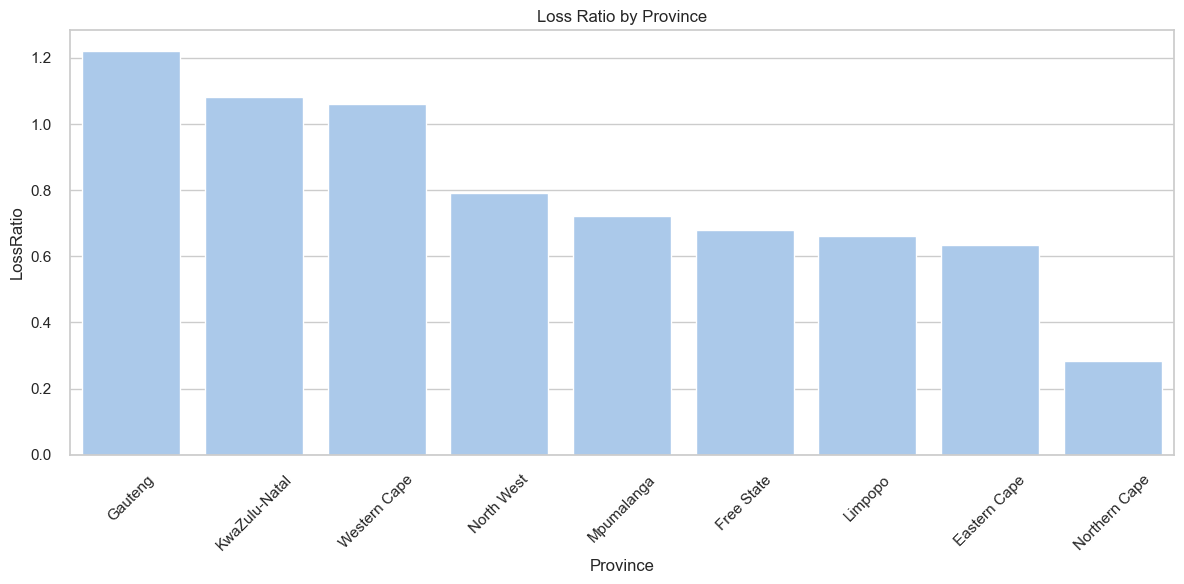

In [13]:
# Visualization 1: Loss Ratio by Province
plt.figure(figsize=(12, 6))
sns.barplot(data=loss_ratio_by_province.sort_values('LossRatio', ascending=False), 
            x='Province', y='LossRatio')
plt.xticks(rotation=45)
plt.title('Loss Ratio by Province')
plt.tight_layout()
plt.savefig('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/outputs/loss_ratio_province.png')
plt.show()


## *V.visualization: Loss Ratio by Province and VehicleType*

C:\Users\user\AppData\Local\Temp\ipykernel_48836\3242951645.py:2: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum()
C:\Users\user\AppData\Local\Temp\ipykernel_48836\3242951645.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio_cross = df.groupby(['Province', 'VehicleType']).apply(


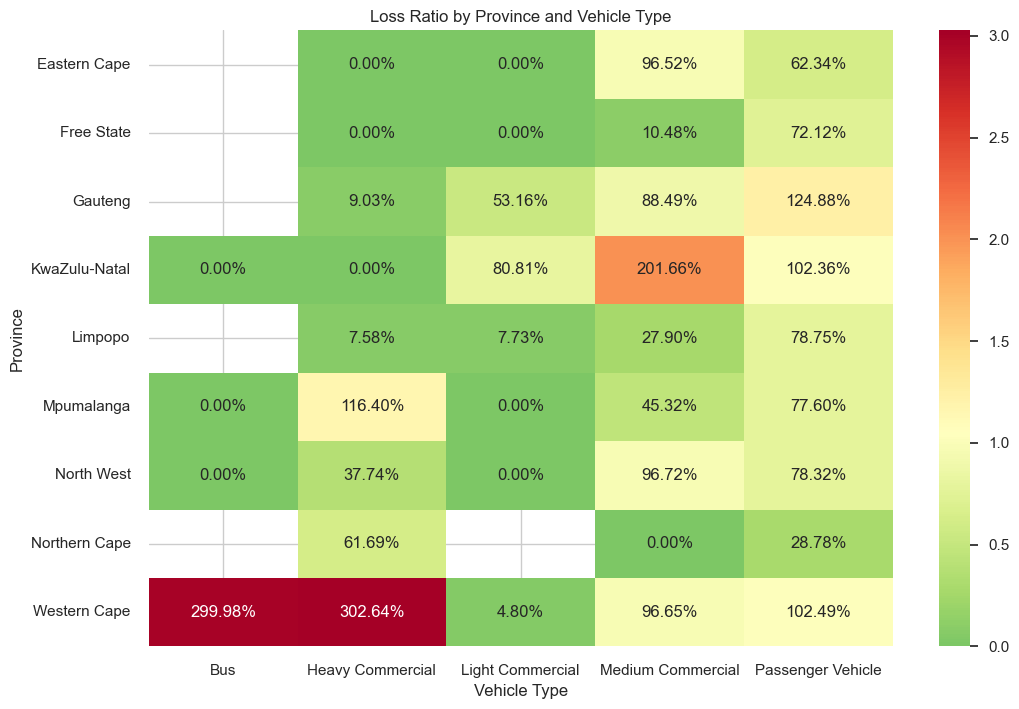

In [38]:
loss_ratio_cross = df.groupby(['Province', 'VehicleType']).apply(
    lambda x: x['TotalClaims'].sum() / x['TotalPremium'].sum()
).unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(loss_ratio_cross, annot=True, fmt=".2%", cmap="RdYlGn_r", center=loss_ratio)
plt.title('Loss Ratio by Province and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Province')
plt.savefig('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/outputs/loss_ratio_vehicle.png')
plt.show()

## *VI. Visualization 2: Temporal Trends of Claims and Premiums*

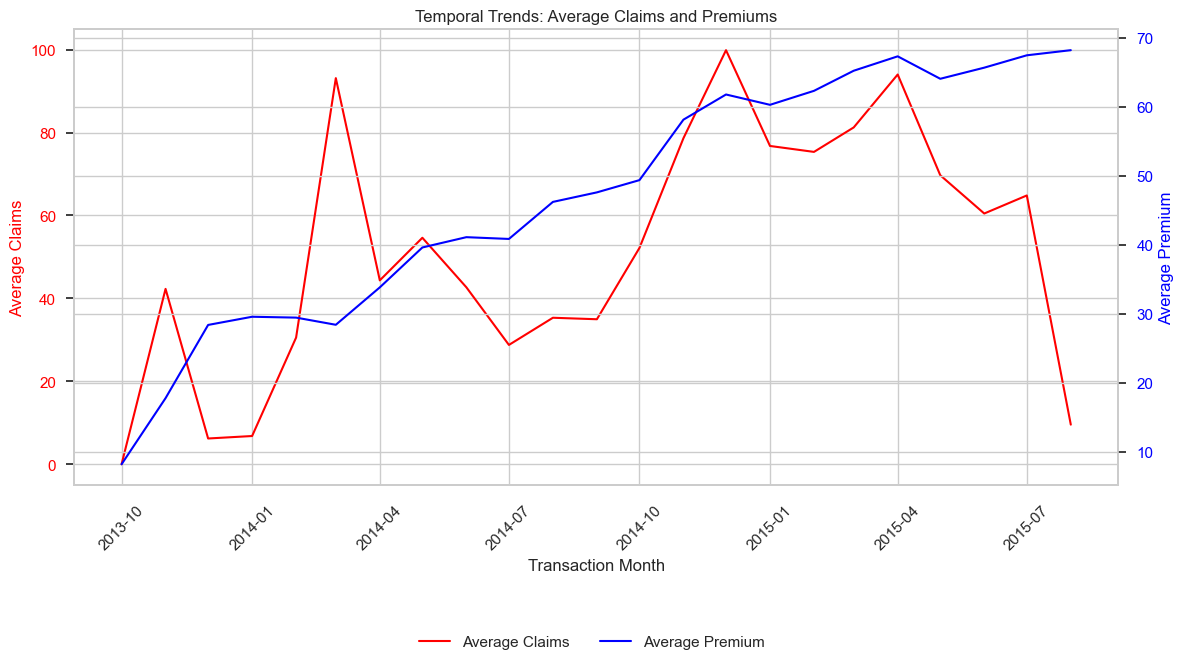

In [36]:
# Visualization 2: Temporal Trends of Claims and Premiums
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(monthly_trends['TransactionMonth'], monthly_trends['AvgClaims'], 
         label='Average Claims', color='red')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Transaction Month')
ax1.set_ylabel('Average Claims', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = ax1.twinx()
ax2.plot(monthly_trends['TransactionMonth'], monthly_trends['AvgPremium'], 
         label='Average Premium', color='blue')
ax2.set_ylabel('Average Premium', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Temporal Trends: Average Claims and Premiums')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()
plt.savefig('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/outputs/temporal_trends.png')
plt.show()

### VII.Visualization : Interactive Bubble Chart of Vehicle Make/Model Performance

<Axes: xlabel='AvgClaim', ylabel='LossRatio'>

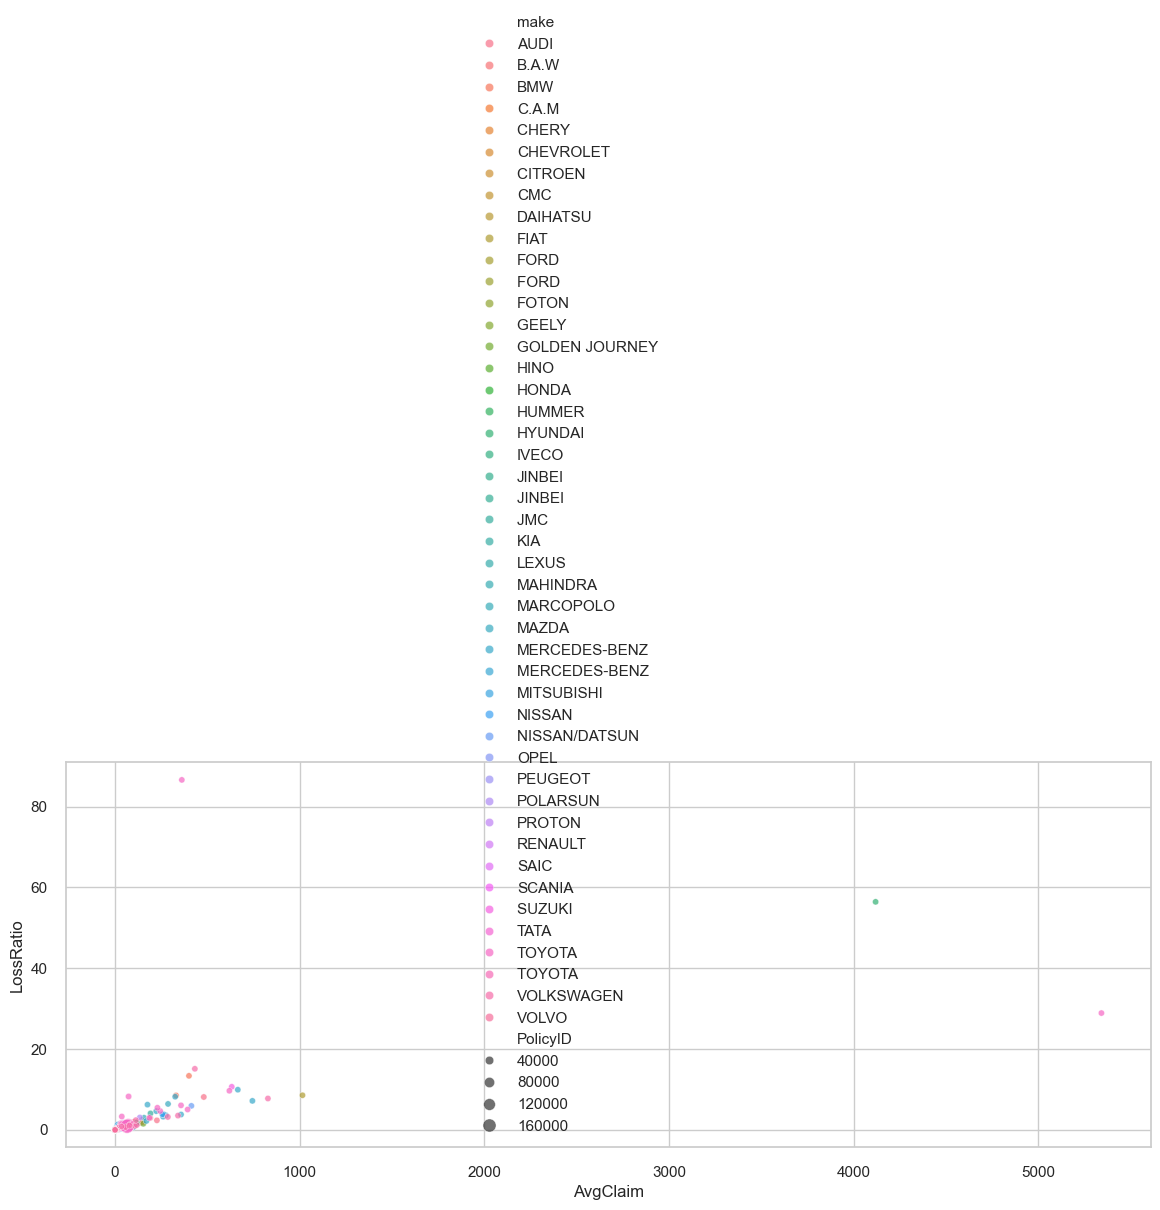

In [48]:
### Visualization 3: Interactive Bubble Chart of Vehicle Make/Model Performance

vehicle_summary = df.groupby(['make','Model']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum',
    'PolicyID': 'count'
}).reset_index()
vehicle_summary['LossRatio'] = vehicle_summary['TotalClaims'] / vehicle_summary['TotalPremium']
vehicle_summary['AvgClaim'] = vehicle_summary['TotalClaims'] / vehicle_summary['PolicyID']

plt.figure(figsize=(14, 5))
sns.scatterplot(
    data=vehicle_summary,
    x='AvgClaim',
    y='LossRatio',
    size='PolicyID',
    hue='make',
    sizes=(20, 100),
    alpha=0.7
)

# VIII. Visualization : Top Vehicle Makes by Claim Amounts

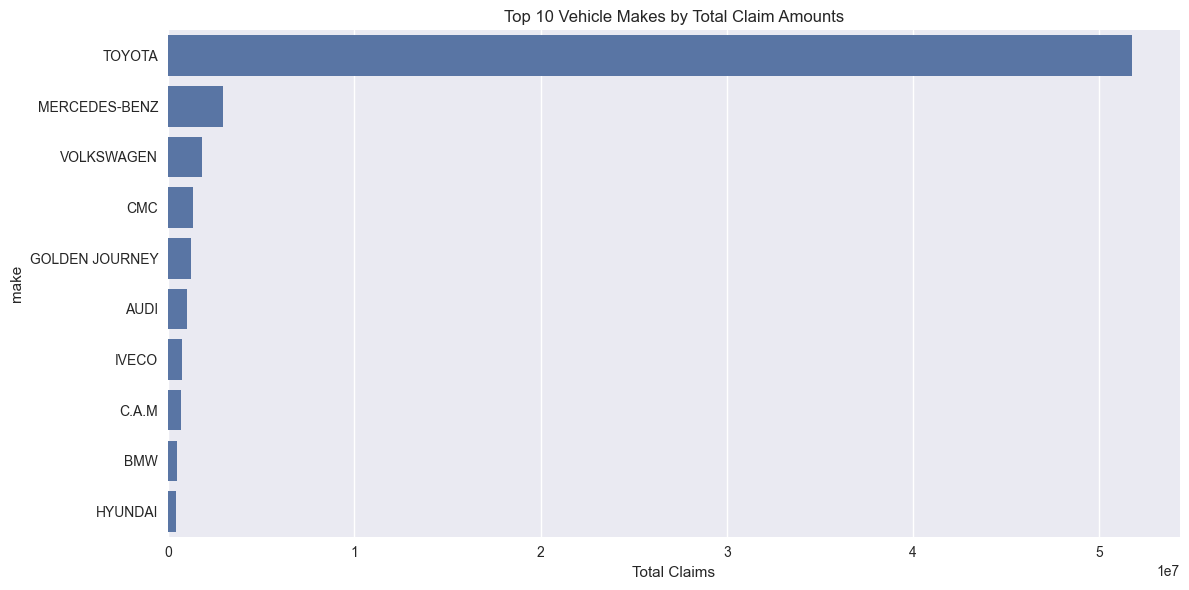

In [4]:
# Visualization 3: Top Vehicle Makes by Claim Amounts
top_makes = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Vehicle Makes by Total Claim Amounts')
plt.xlabel('Total Claims')
plt.tight_layout()
plt.savefig('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/top_makes_claims.png')
plt.show()

In [16]:
#save results to a summary file
with open('F:/Insurance_Risk-Analysis_Predictive_Modelling/data/eda_summary.txt', 'w') as f:
    f.write(f"Overall Loss Ratio: {loss_ratio:.2f}\n\n")
    f.write("Loss Ratio by Province:\n")
    f.write(loss_ratio_by_province.to_string(index=False))
    f.write("\n\nLoss Ratio by Vehicle Type:\n")
    f.write(loss_ratio_by_vehicle.to_string(index=False))
    f.write("\n\nLoss Ratio by Gender:\n")
    f.write(loss_ratio_by_gender.to_string(index=False))